We will analyze the open dataset with data on the passengers aboard the Titanic.

The data file for this assignment can be downloaded from Kaggle website: https://www.kaggle.com/c/titanic/data, file `train.csv`. The definition of all variables can be found on the same Kaggle page, in the Data Dictionary section.

**What categories of passengers were most likely to survive the Titanic disaster?**

## Logic of the Analysis

In my analysis, 

- I start with importing necessary libraries and then reading the train.csv into dataframe. 

- In order to see the data as a big picture, I examine the data and obtain the information of number of entries, columns, data types and sizes. In this way, we can also detect any missing values. I observe that there are missing values at the `Age`, `Cabin` and `Embarked` columns. I treated missing values in Data Preparation part under [Missing Values](#missingValues). 
- I also group all age values to make the analysis easier under [Grouping Ages](#group). 
- In the last step of data preparation, I [map](#mapping) some labels to interpret the data easier; passenger classes are mapped from 1,2,3 to upper, middle, and lower class and ports are mapped from S,C,Q to Southampton, Cherbourg, and Queenstown. 
- After data preparation process, I start my analysis by looking at the overall survival rate. Then examine the effects of [gender](#gender), [age](#age), [class](#class), [family ties](#family), [embarkation](#embarked), [fares](#fares), and [family ties](#family). For each category, survival rates are indicated. I also used a new attribute as family size to determine the effect of family size/ties.

I summarized my findings on each attribute in summary section. Here is the table of contents of this analysis. 


# Table Of Contents
- [Importing Libraries and Reading CSV into dataframe](#import)
- [Examining the Dataframe](#examine)
- [Data Preparation](#prep)
    1. [Missing Values](#missingValues)<br>
        1.1. [Dropping missing Cabin values](#cabin)        
        1.2. [Filling missing Embarked values](#embark)        
        1.3. [Filling missing Age values](#age)    
    2. [Grouping Ages](#group)
    3. [Mapping Data](#mapping)
    4. [Data Analysis](#dataAnalysis)    
        4.1. [Total Number of Survivals](#total) <br>
        4.2. [Survivals Based on Gender](#gender) <br>
        4.3. [Survivals Based on Age](#age\n)<br>
        4.4. [Survivals Based on Gender and Age](#agegender)<br>
        4.5. [Survivals Based on Class of Passangers](#class)<br>
        4.6. [Survivals Based on Gender and Class of Passangers](#genderclass)<br>
        4.7. [Survivals Based on Embarkation](#embarked)<br>
        4.8. [Survivals Based on Embarkation and Gender](#embarkgender)<br>
        4.9. [Survivals Based on Fares](#fares)<br>
        4.10. [Survivals Based on Family Relationship](#family)<br>
- [Summary](#summary)




# Importing Libraries and Reading CSV into dataframe <a id='import'></a>

In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
#allow plots and visualisations to be displayed in the report
%matplotlib inline

from matplotlib import pyplot as plt
from matplotlib import style



In [2]:
df=pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Examining the dataframe <a id='examine'></a>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<b>Above we can see that 38% of the passengers survived the Titanic. We can also see that the passenger ages range from 0.4 to 80.

# Data Preparation <a id='prep'></a>

## 1. Missing Values <a id='missingValues'></a>

In [5]:
#We check to see if there is any missing values. 
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

<b>We can see some features that contain missing values, `Age`, `Cabin` and `Embarked`. 

In [6]:
# We will check the percentage of each missing category and sort it in decending order. 
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


<b>The `Embarked` feature has only 2 missing values, which can easily be filled. The `Age` feature has 177 missing values. 77 % of the `Cabin` feature are missing, it looks like that we might want to drop it from the dataset. As I am going to use these categories in my analysis, first thing I want to do is to fill/drop the missing values.

1. I will drop missing `Cabin` values as it is more than 50%.
2. I will fill 2 `Embarked` missing values with the most common ones. 
3. Lastly, I will fill missing `Age` values with random values around mean.

## 1.1. Dropping missing `Cabin` values <a id='cabin'></a>

In [7]:
df.drop('Cabin',1,inplace=True) #1 is for column, 0 is for row.
df.isnull().sum().sort_values(ascending=False) 

Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [8]:
df.info() # to check if we dropped the cabin values. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


## 1.2. Filling missing `Embarked`  values <a id='embark'></a>

 <b> I will find most common embarked variable and assign it to NAN values. 

In [9]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [10]:
common_value = 'S'
df['Embarked'].fillna(common_value,inplace=True)

In [11]:
df.isnull().sum().sort_values(ascending=False) # to check if we filled the embark values. 

Age            177
Embarked         0
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [12]:
df.info() # to check if we filled the embark values. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


## 1.3. Filling missing `Age` values  <a id='age'></a>

<b> I will create an array that contains random numbers, which are computed based on the `mean` age value in regards to the `standard deviation and is_null`.

In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
for dataset in df:
    mean = df["Age"].mean()
    std = df["Age"].std()
    is_null = df["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = df["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    df["Age"] = age_slice
    df["Age"] =df["Age"].astype(int)
df["Age"].isnull().sum()


0

In [15]:
df.isnull().sum().sort_values(ascending=False)   # to check if we filled the age values. 

Embarked       0
Fare           0
Ticket         0
Parch          0
SibSp          0
Age            0
Sex            0
Name           0
Pclass         0
Survived       0
PassengerId    0
dtype: int64

In [16]:
df.head(20) # to check the first 20 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,32,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,C


## 2. Grouping Ages  <a id='group'></a>


<b> To make the Age  column easier to analyse, it would be a good idea to group the ages. This way we can compare groups of ages instead of individual ages.

In [17]:
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df['age_group'] = pd.cut(df.Age, range(0, 81, 10), right=False, labels=age_labels)

## 3. Mapping data  <a id='mapping'></a>

<b> To make it easier to understand the labels, I map the following labels: 

In [18]:
# PClass map
pclass_map = {1: 'Upper Class', 2: 'Middle Class', 3: 'Lower Class'}
df['Pclass'] = df['Pclass'].map(pclass_map)
# Embarkation port map
port_map = {'S': 'Southampton', 'C': 'Cherbourg','Q':'Queenstown'}
df['Embarked'] = df['Embarked'].map(port_map)

## 4. Data Analysis <a id='dataAnalysis'></a>

<b> After handling missing values, I will start my analysis for survival question. 

## 4.1. Total Number of Survivals <a id='total'></a>

In [19]:
df.Survived.value_counts() #Number of survivals

0    549
1    342
Name: Survived, dtype: int64

In [20]:
#Calculate the total proportion of passengers survived, (it can also be seen from the Survived mean value)
population_Percentage_Survived = (342/891)*100
population_Percentage_Survived

38.38383838383838

<b> As can be also seen from the mean of Survived column in [filling age](#age) table, I found the survival rate as 38.4% of the passengers. 

## 4.2. Survivals Based on Gender <a id='gender'></a>

In [21]:
#Calculate the proportion of passengers surviving for male.
df[df.Sex=='male'].Survived.value_counts()

0    468
1    109
Name: Survived, dtype: int64

In [22]:
#Calculate the proportion of passengers surviving for female.
df[df.Sex=='female'].Survived.value_counts()

1    233
0     81
Name: Survived, dtype: int64

In [23]:
#Proportion of survivors by gender.
df.groupby('Sex').Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

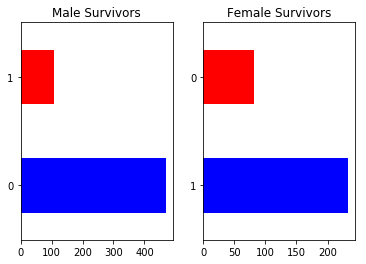

In [24]:
#Plotting Survivors based on gender
fig,axs = plt.subplots(1,2)
df[df.Sex=='male'].Survived.value_counts().plot(kind="barh",ax=axs[0], title='Male Survivors',color=['blue', 'red'])
df[df.Sex=='female'].Survived.value_counts().plot(kind="barh",ax=axs[1], title='Female Survivors',color=['blue', 'red'])

1    45
0    33
Name: Survived, dtype: int64
children survival proportion = 0.5769230769230769


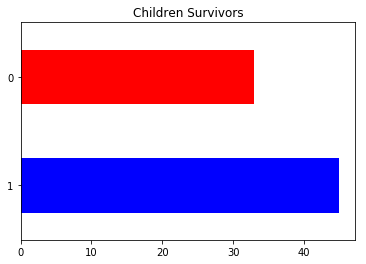

In [25]:
#Calculate the proportion of passengers surviving for children.
print(df[df.Age < 15].Survived.value_counts())
print("children survival proportion =",df[df.Age < 15].Survived.mean())

df[df.Age < 15].Survived.value_counts().plot(kind="barh",title='Children Survivors',color=['blue', 'red'])

In [26]:
df[df.Age < 15].Survived.mean()  #Proportion of children survivors

0.5769230769230769

Text(0.5, 1.0, '% of survivors by gender')

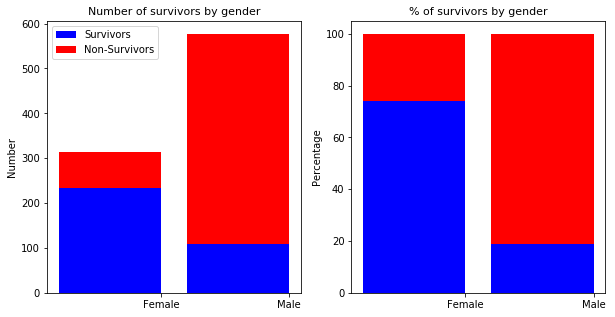

In [27]:
# new parameter definitions
survivors_data = df[df.Survived==True]
non_survivors_data = df[df.Survived==False]

# calculate values for each survival status
survivors_gender = survivors_data.groupby(['Sex']).size().values
non_survivors_gender = non_survivors_data.groupby(['Sex']).size().values

# calculate totals for percentates
totals = survivors_gender + non_survivors_gender

def calculate_percentage(val, total, format_percent = False):
    """Calculates the percentage of a value over a total"""
    percent = np.divide(val, total, dtype=float)
    if format_percent:
        percent = as_percent(percent)
    return percent

# use calculate_percentage_function to calculate percentage of the total
data1_percentages = calculate_percentage(survivors_gender, totals)*100 
data2_percentages = calculate_percentage(non_survivors_gender, totals)*100


gender_categories = ['Female', 'Male']

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
# plot chart for number of survivors by class
ax1.bar(range(len(survivors_gender)), survivors_gender, label='Survivors', alpha=1, color='b')
ax1.bar(range(len(non_survivors_gender)), non_survivors_gender, bottom=survivors_gender, label='Non-Survivors', alpha=1, color='r')
plt.sca(ax1)
plt.xticks([0.4, 1.4], gender_categories)
ax1.set_ylabel("Number")
ax1.set_xlabel("")
ax1.set_title("Number of survivors by gender",fontsize=11)
plt.legend(loc='upper left')

# plot chart for percentage of survivors by class
ax2.bar(range(len(data1_percentages)), data1_percentages, alpha=1, color='b')
ax2.bar(range(len(data2_percentages)), data2_percentages, bottom=data1_percentages, alpha=1, color='r')
plt.sca(ax2)
plt.xticks([0.4, 1.4],  gender_categories)
ax2.set_ylabel("Percentage")
ax2.set_xlabel("")
ax2.set_title("% of survivors by gender",fontsize=11)

<b> Based on the above proportions and plots, there were a high number of males on board compared to the number of females. The plot (% of survivors by gender) shows that females had a higher survival proportion (74.2%) compared to the one of males (18.9%). Also, children under age of 15 had a survival rate of 57.7%.

## 4.3. Survivals Based on Age  <a id='age'></a>

Text(0.5, 1.0, '% of survivors by age group')

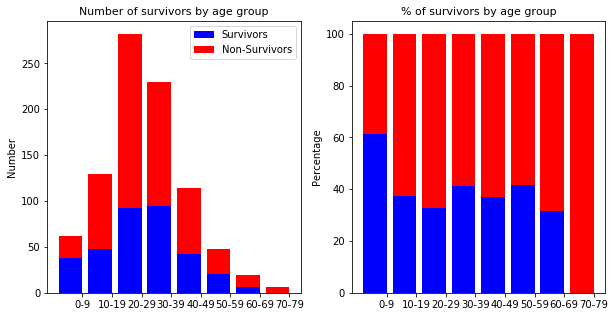

In [28]:
# calculate values for each survival status
survivors_age_group = survivors_data.groupby(['age_group']).size().values
non_survivors_age_group = non_survivors_data.groupby(['age_group']).size().values

# calculate totals for percentates
totals = survivors_age_group + non_survivors_age_group

# use calculate_percentage_function to calculate percentage of the total
data1_percentages = calculate_percentage(survivors_age_group, totals)*100 
data2_percentages = calculate_percentage(non_survivors_age_group, totals)*100 


tick_spacing = np.array(range(len(age_labels)))+0.4


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
# plot chart for count of survivors by class
ax1.bar(range(len(survivors_age_group)), survivors_age_group, label='Survivors', alpha=1, color='b')
ax1.bar(range(len(non_survivors_age_group)), non_survivors_age_group, bottom=survivors_age_group, label='Non-Survivors', alpha=1, color='r')
plt.sca(ax1)
plt.xticks(tick_spacing, age_labels )
ax1.set_ylabel("Number")
ax1.set_xlabel("")
ax1.set_title("Number of survivors by age group",fontsize=11)
plt.legend(loc='upper right')

# plot chart for percentage of survivors by class
ax2.bar(range(len(data1_percentages)), data1_percentages, alpha=1, color='b')
ax2.bar(range(len(data2_percentages)), data2_percentages, bottom=data1_percentages, alpha=1, color='r')
plt.sca(ax2)
plt.xticks(tick_spacing,  age_labels)
ax2.set_ylabel("Percentage")
ax2.set_xlabel("")
ax2.set_title("% of survivors by age group",fontsize=11)


<b> We can see that the majority of passengers were aged between 20-29. On the other hand, the survival rate is highest in 0-9 age group. 

## 4.4. Survivals Based on Age and Gender  <a id='agegender'></a>

In [29]:
df.groupby(['Sex','age_group']).Survived.mean()

Sex     age_group
female  0-9          0.633333
        10-19        0.750000
        20-29        0.724138
        30-39        0.780488
        40-49        0.682927
        50-59        0.888889
        60-69        1.000000
male    0-9          0.593750
        10-19        0.116883
        20-29        0.148718
        30-39        0.209459
        40-49        0.191781
        50-59        0.133333
        60-69        0.133333
        70-79        0.000000
Name: Survived, dtype: float64

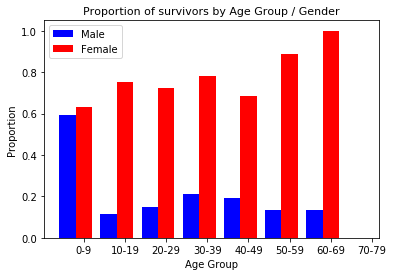

In [30]:
male_data = df[df.Sex == "male"].groupby('age_group').Survived.mean().values
female_data = df[df.Sex == "female"].groupby('age_group').Survived.mean().values
ax = plt.subplot()
male_plt_position = np.array(range(len(age_labels)))
female_plt_position = np.array(range(len(age_labels)))+0.4
ax.bar(male_plt_position, male_data,width=0.4,label='Male',color='b')
ax.bar(female_plt_position, female_data,width=0.4,label='Female',color='r')
plt.xticks(tick_spacing,  age_labels)
ax.set_ylabel("Proportion")
ax.set_xlabel("Age Group")
ax.set_title("Proportion of survivors by Age Group / Gender",fontsize=11)
plt.legend(loc='best')
plt.show()

<b> After looking at the proportion of survivors by age group and gender, the data supports notion of women and children first. The plot shows that children (0-9 years old, male and female) and women (all ages) had a much higher proportion of survivors. This result supports the notion of the seats in the lifeboats been given to Women and Children first.

## 4.5. Survivals Based on Class of Passengers  <a id='class'></a>

Pclass    Lower Class  Middle Class  Upper Class
Survived                                        
0                 372            97           80
1                 119            87          136


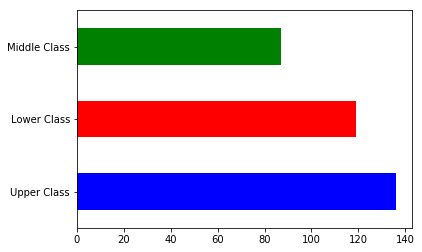

In [31]:
#Calculate the total proportion of passengers for each class of passenger
table = pd.crosstab(df['Survived'],df['Pclass'])
print(table)

#print([df.Pclass.value_counts(),df[df.Survived==1].Pclass.value_counts()])
df[df.Survived==1].Pclass.value_counts().plot(kind="barh",color=['blue', 'red', 'green'])

In [32]:
#Proportion of survivors by class
df.groupby('Pclass').Survived.mean()

Pclass
Lower Class     0.242363
Middle Class    0.472826
Upper Class     0.629630
Name: Survived, dtype: float64

Text(0.5, 1.0, '% of survivors by class')

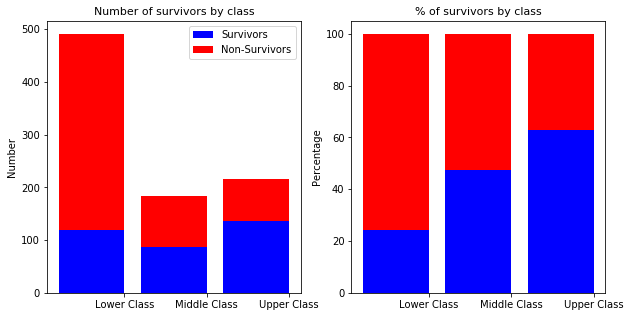

In [33]:
# calculate values for each survival status
survivors_class = survivors_data.groupby(['Pclass']).size().values
non_survivors_class = non_survivors_data.groupby(['Pclass']).size().values

# calculate totals for percentates
totals = survivors_class + non_survivors_class

# use calculate_percentage_function to calculate percentage of the total
data1_percentages = calculate_percentage(survivors_class, totals)*100 
data2_percentages = calculate_percentage(non_survivors_class, totals)*100 


class_categories = ['Lower Class', 'Middle Class', 'Upper Class']


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
# plot chart for count of survivors by class
ax1.bar(range(len(survivors_class)), survivors_class, label='Survivors', alpha=1, color='b')
ax1.bar(range(len(non_survivors_class)), non_survivors_class, bottom=survivors_class, label='Non-Survivors', alpha=1, color='r')
plt.sca(ax1)
plt.xticks([0.4, 1.4, 2.4], class_categories )
ax1.set_ylabel("Number")
ax1.set_xlabel("")
ax1.set_title("Number of survivors by class",fontsize=11)
plt.legend(loc='best')

# plot chart for percentage of survivors by class
ax2.bar(range(len(data1_percentages)), data1_percentages, alpha=1, color='b')
ax2.bar(range(len(data2_percentages)), data2_percentages, bottom=data1_percentages, alpha=1, color='r')
plt.sca(ax2)
plt.xticks([0.4, 1.4, 2.4],  class_categories)
ax2.set_ylabel("Percentage")
ax2.set_xlabel("")
ax2.set_title("% of survivors by class",fontsize=11)

<b> Although the number of lower class passengers were higher than other classes, the lower class had the lowest survival rate 24.2%. The upper class passengers had the highest survival rate of almost 63%.

## 4.6. Survivals for each Gender and Class of Passengers.  <a id='genderclass'></a>

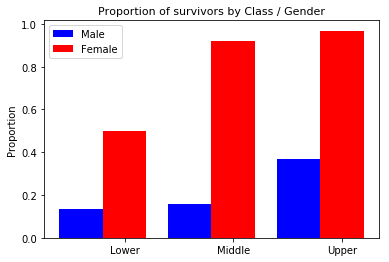

In [34]:
male_data = df[df.Sex == "male"].groupby('Pclass').Survived.mean().values
female_data = df[df.Sex == "female"].groupby('Pclass').Survived.mean().values

ax = plt.subplot()
class_labels = ['Lower', 'Middle', 'Upper']

male_plt_position = np.array(range(len(class_labels)))
female_plt_position = np.array(range(len(class_labels)))+0.4

ax.bar(male_plt_position, male_data,width=0.4,label='Male',color='b')
ax.bar(female_plt_position, female_data,width=0.4,label='Female',color='r')

tick_spacing2 = np.array(range(len(class_labels)))+0.4

plt.xticks(tick_spacing2, class_labels)

ax.set_ylabel("Proportion")
ax.set_title("Proportion of survivors by Class / Gender",fontsize=11)

plt.legend(loc='best')
plt.show()

<b> It looks that in all classes female survival rate is higher than that of males. An outstanding result from the plot above is that almost all female passengers in upper class survived, followed by female passengers in middle class. 

## 4.7. Survivals Based on Embarkation <a id='embarked'></a>

Embarked  Cherbourg  Queenstown  Southampton
Survived                                    
0                75          47          427
1                93          30          219
Embark total numbers
 Southampton    646
Cherbourg      168
Queenstown      77
Name: Embarked, dtype: int64


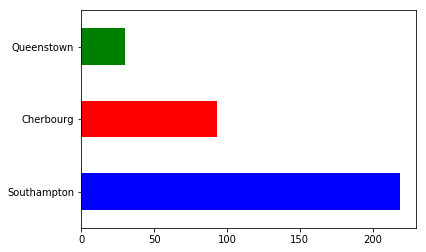

In [35]:
#Calculate the total proportion of passengers for each embarkation of passenger

table = pd.crosstab(df['Survived'],df['Embarked'])
print(table)

#print([df.Pclass.value_counts(),df[df.Survived==1].Pclass.value_counts()])
df[df.Survived==1].Embarked.value_counts().plot(kind="barh",color=['blue', 'red','green'])


print("Embark total numbers\n",df.Embarked.value_counts())

In [36]:
#Proportion of survivors by embarked
df.groupby('Embarked').Survived.mean()

Embarked
Cherbourg      0.553571
Queenstown     0.389610
Southampton    0.339009
Name: Survived, dtype: float64

<b> We can see that the majority of passengers (646 of 891 - 72.5%) embarked in Southhampton and only 77 passengers - 8.6% - embarked in Queenstown. 55.4% of passengers embarked in Cherbourg survived compared to 34% and 39% at Southhampton and Queensberg, respectively. While the number of Southampton embarked passengers were the highest among others, the survival rate was the lowest. 





## 4.8. Survivals Based on Embarkation and Gender <a id='embarkgender'></a>

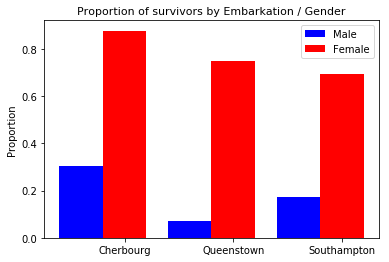

In [37]:
male_data = df[df.Sex == "male"].groupby('Embarked').Survived.mean().values
female_data = df[df.Sex == "female"].groupby('Embarked').Survived.mean().values

ax = plt.subplot()
embark_labels = ['Cherbourg', 'Queenstown', 'Southampton']

male_plt_position = np.array(range(len(embark_labels)))
female_plt_position = np.array(range(len(embark_labels)))+0.4

ax.bar(male_plt_position, male_data,width=0.4,label='Male',color='b')
ax.bar(female_plt_position, female_data,width=0.4,label='Female',color='r')

tick_spacing2 = np.array(range(len(embark_labels)))+0.4

plt.xticks(tick_spacing2,  embark_labels)

ax.set_ylabel("Proportion")
#ax.set_xlabel("Embarked")
ax.set_title("Proportion of survivors by Embarkation / Gender",fontsize=11)

plt.legend(loc='best')
plt.show()

<b> Female passengers embarked in all ports had the higher survival rate than males. There seems to be a pattern related to gender that could be contributing to the increased survivability of the Cherbourg passengers compared to the other ports.

## 4.9. Survivals Based on Fares  <a id='fare'></a>

Fare      0.0000    4.0125    5.0000    6.2375    6.4375    6.4500    \
Survived                                                               
0               14         1         1         1         1         1   
1                1         0         0         0         0         0   

Fare      6.4958    6.7500    6.8583    6.9500      ...     153.4625  \
Survived                                            ...                
0                2         2         1         1    ...            1   
1                0         0         0         0    ...            2   

Fare      164.8667  211.3375  211.5000  221.7792  227.5250  247.5208  \
Survived                                                               
0                0         0         1         1         1         1   
1                2         3         0         0         3         1   

Fare      262.3750  263.0000  512.3292  
Survived                                
0                0         2         0  
1         

Text(0, 0.5, 'Fares')

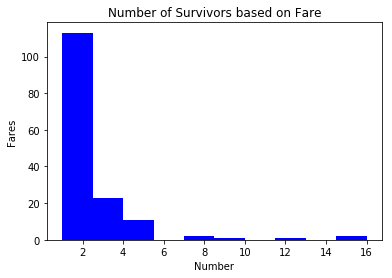

In [38]:
#Calculate the total proportion of passengers for each fare of passenger

table = pd.crosstab(df['Survived'],df['Fare'])
print(table)

df[df.Survived==1].Fare.value_counts().plot(kind="hist",color='blue')
plt.title('Number of Survivors based on Fare')
plt.xlabel('Number')
plt.ylabel('Fares')

#print("Fare total numbers\n",df.Fare.value_counts())


<b> As we move towards lower fare prices, we see a higher survival rate. However, there is an outlier for the `Fare` price. 

## 4.10. Survivals Based on Family Relationship  <a id='family'></a>

In [39]:
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [40]:
df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [41]:
correlation=df.corr()
correlation

,PassengerId,Survived,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,0.034552,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.058822,-0.035322,0.081629,0.257307
Age,0.034552,-0.058822,1.000000,-0.208850,-0.168971,0.088450
SibSp,-0.057527,-0.035322,-0.208850,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,-0.168971,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,0.088450,0.159651,0.216225,1.000000


In [42]:
#defining new variable 
df['familySize']=df['Parch']+df['SibSp']
#familySize

Text(0, 0.5, 'Family Size')

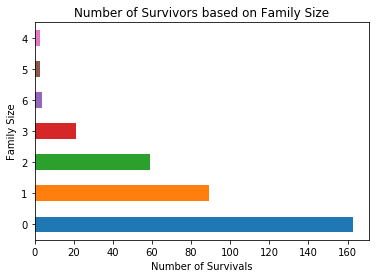

In [43]:
df[df.Survived==1].familySize.value_counts().plot(kind="barh")
plt.title('Number of Survivors based on Family Size')
plt.xlabel('Number of Survivals')
plt.ylabel('Family Size')

<b> We can see that the passengers travelling alone had the highest survival rate. 

## Summary  <a id='summary'></a>

By doing some exploratory data analysis (EDA), I used seaborn and matplotlib libraries to create visualizations, check missing data, learn which features are important, and understand better the dataset. During feature engineering and data processing, I computed missing values, grouped values into categories, and created new feature. 

In summary, the results of the analysis show that

- 38.4% of the passengers survived the Titanic, 
- the passenger age range was from 0.4 to 80 years old, 
- `Age,Cabin and Embarked` values were missing and they were either filled or dropped for the purpose of analysis,
- women were much more likely to survive than men, especially women in the first and second class. It also shows that men in the first class were almost 3-times more likely to survive than men in the second and third classes,
- the number of males on board were higher than that of females but the number of females had the higher survivals than males,
- children below 15 years of age have higher chances of surviving,
- most of the passenger were aged between 20-29 but survival rate was higher in 0-9 age group,
- 63% of the 1st class, 48% of the 2nd class, and only 24% of the 3rd class passengers survived the Titanic wreck but the number of 3rd class passengers on board were higher than others,
- almost all 1st class females survived the wreck,
- although the number of Southampton embarked passengers were the highes, survival rate of the same port was the lowest,
- females boarded on all ports survived in higher rates,
- the lower the fare was, the higher the chance of survival was,
- SibSp and Parch would make more sense as a combined feature (family size) that shows the total number of relatives a person has on the Titanic. Hence, single passenger survival rate was highest.
    
    List of attributes used in analysis:
    - total number of survivals
    - sex
    - age
    - sex and age
    - class of passengers
    - sex and class of passengers
    - embarkation 
    - embarkation and sex
    - fare
    - SIbSP and Parch
    
    New attribute used in analysis:
    - Family size

I did not use PassengerId and Ticket number attributes as they do not contribute to survival and do not provide an insight in analysis. Several people can share a ticket number including family members except this would cover situations like nannies, or close friends.

Last but not least, I also want to see if the Captain of Titanic was survived. 

In [44]:
df[df['Name'].str.contains("Capt")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_group,familySize
745,746,0,Upper Class,"Crosby, Capt. Edward Gifford",male,70,1,1,WE/P 5735,71.0,Southampton,70-79,2


`The captain goes down with the ship` is a tradition that in an emergency, the captain will either save them or die when trying. In Titanic, Captain Edward Gifford Crosby went down with Titanic trying to save the passengers.